# Bae & Woo 2016 Biconical Outflow Model 3D

The manuscript that this model is based on is from Bae & Woo et al. 2016 can be found at (https://ui.adsabs.harvard.edu/abs/2016ApJ...828...97B/abstract)[https://ui.adsabs.harvard.edu/abs/2016ApJ...828...97B/abstract]  This notebook reproduces the models therein for purposes of reproducibility only.  Note that this notebook only works with Python 2 Scipy library and is not compatible with Python 3 Scipy due to the `scipy.interpolate.griddata` incompatibility. 

In [1]:
% matplotlib notebook
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch
from matplotlib import animation
from scipy.interpolate import griddata, interp1d
from scipy.integrate import simps
from scipy.ndimage import gaussian_filter
import matplotlib.cm as cm
import os 
import shutil
import sys
import matplotlib
import time
matplotlib.rcParams['agg.path.chunksize'] = 100000
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import biconical_outflow_model_3d as bicone # <-- Import  
# plt.style.use('dark_background')

print np.__version__
print sp.__version__

1.11.3
1.1.0


In [2]:
# Model Parameters 
A         = 0.90 # dust extinction level (0.0 - 1.0)
tau       = 5.00  # shape of flux profile
D         = 1.0  # length of bicone (arbitrary units)
fn        = 1.0e3 # initial flux value at center

theta_in_deg  = 20.0     # inner opening angle (degrees)
theta_out_deg = 40.0    # outer opening angle (degrees)

# Bicone inclination and PA
theta_B1_deg  = 30.0  # rotation along x
theta_B2_deg  = 0.0     # rotation along y
theta_B3_deg  = 0.0     # rotation along z
# Dust plane inclination and PA
theta_D1_deg  = 135.0    # rotation along x
theta_D2_deg  = 0.0     # rotation along y
theta_D3_deg  = 0.0     # rotation along z

# Velocity profile parameters
vmax= 1000.0 # km/s
vtype ='decreasing' # 'increasing','decreasing', or 'constant'
# vtype = 'constant'
# vtype = 'increasing'

# Sampling paramters
sampling = 100 # point sampling
# 3d Plot orientation
azim = 45
elev = 15
# 2d Map options
map_interpolation = 'none'
# emission model options
obs_res = 68.9 # resolution of SDSS for emission line model
nbins = 60 # number of bins for emission line histogram 
########################################################################################

### Generate the bicone model in 3D

<IPython.core.display.Javascript object>


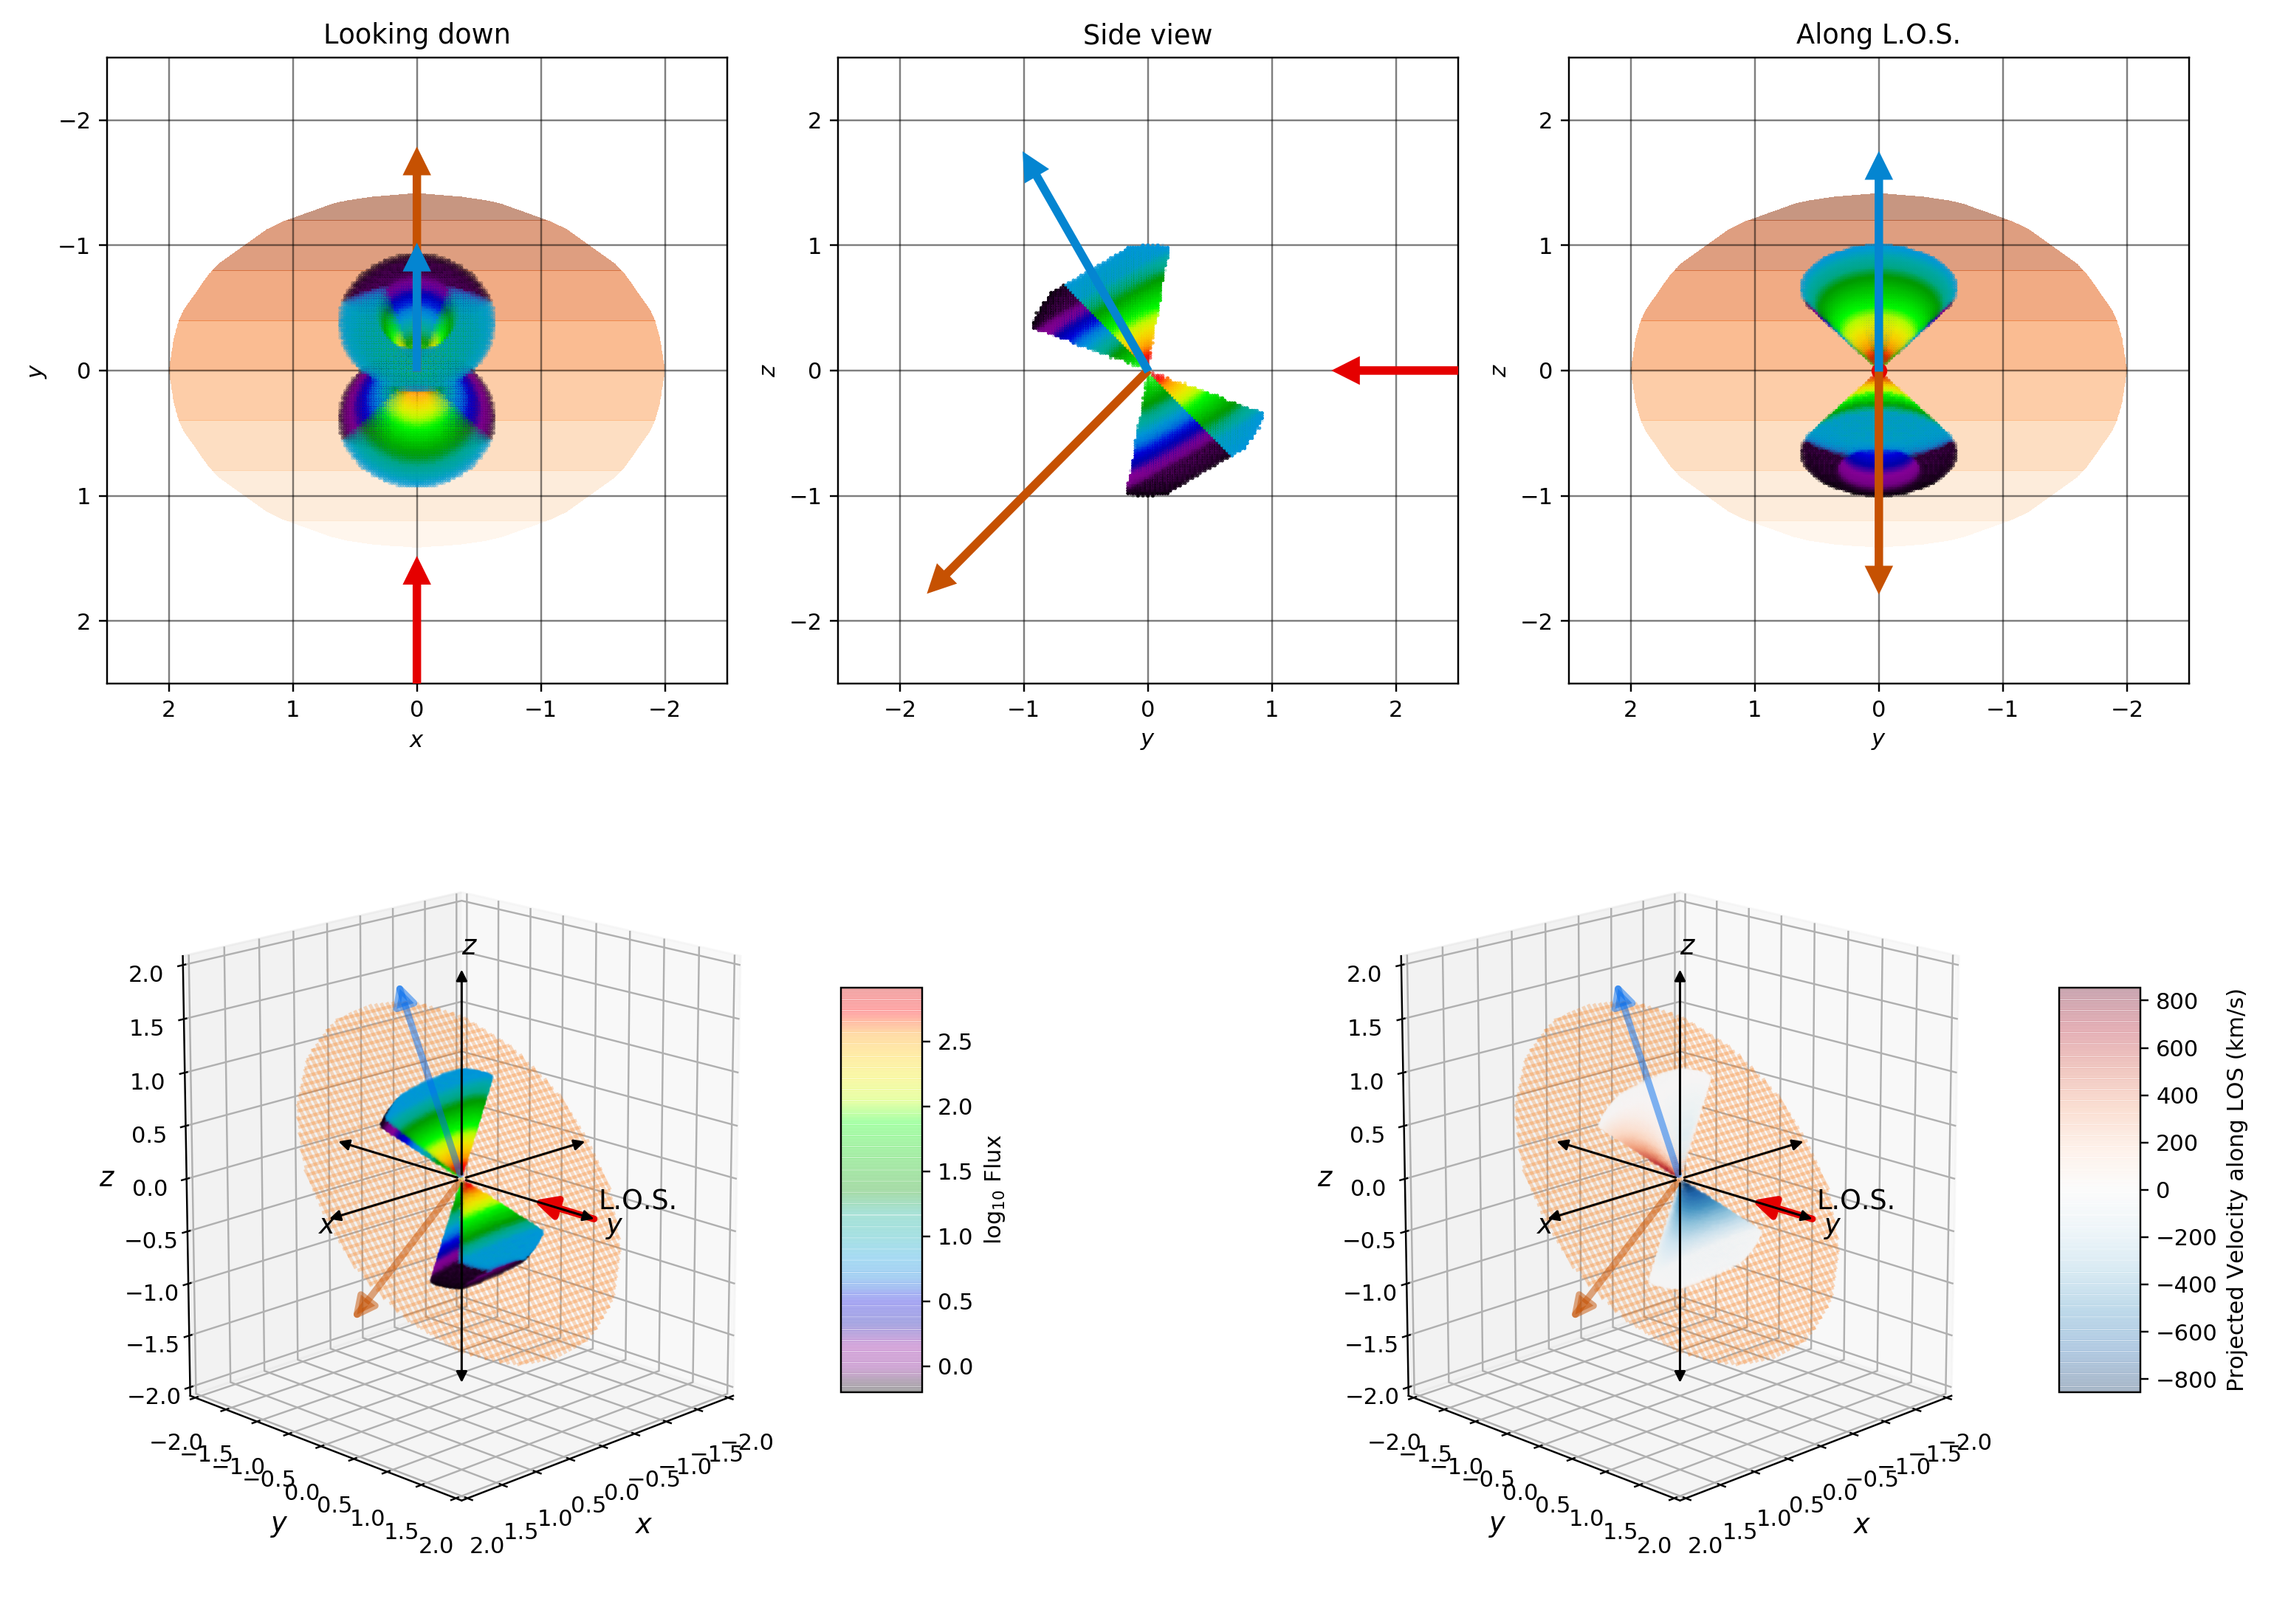


 Done! 



In [3]:
# Bicone coordinate, flux, and velocity grids
xbgrid,ybgrid,zbgrid,fgrid,vgrid = bicone.generate_bicone(theta_in_deg, theta_out_deg,
                                  theta_B1_deg, theta_B2_deg, theta_B3_deg,
                                  theta_D1_deg, theta_D2_deg, theta_D3_deg,
                                  D=D, tau=tau, fn=fn, A=A,
                                  vmax=vmax, vtype=vtype,
                                  sampling=sampling,plot=True,orientation=(azim,elev),save_fig=True)


print('\n Done! \n')

### Generate the 2D flux maps

Integrated velocity = -54.6440873482 (km/s)
Integrated velocity dispersion = 305.466014687 (km/s)


<IPython.core.display.Javascript object>


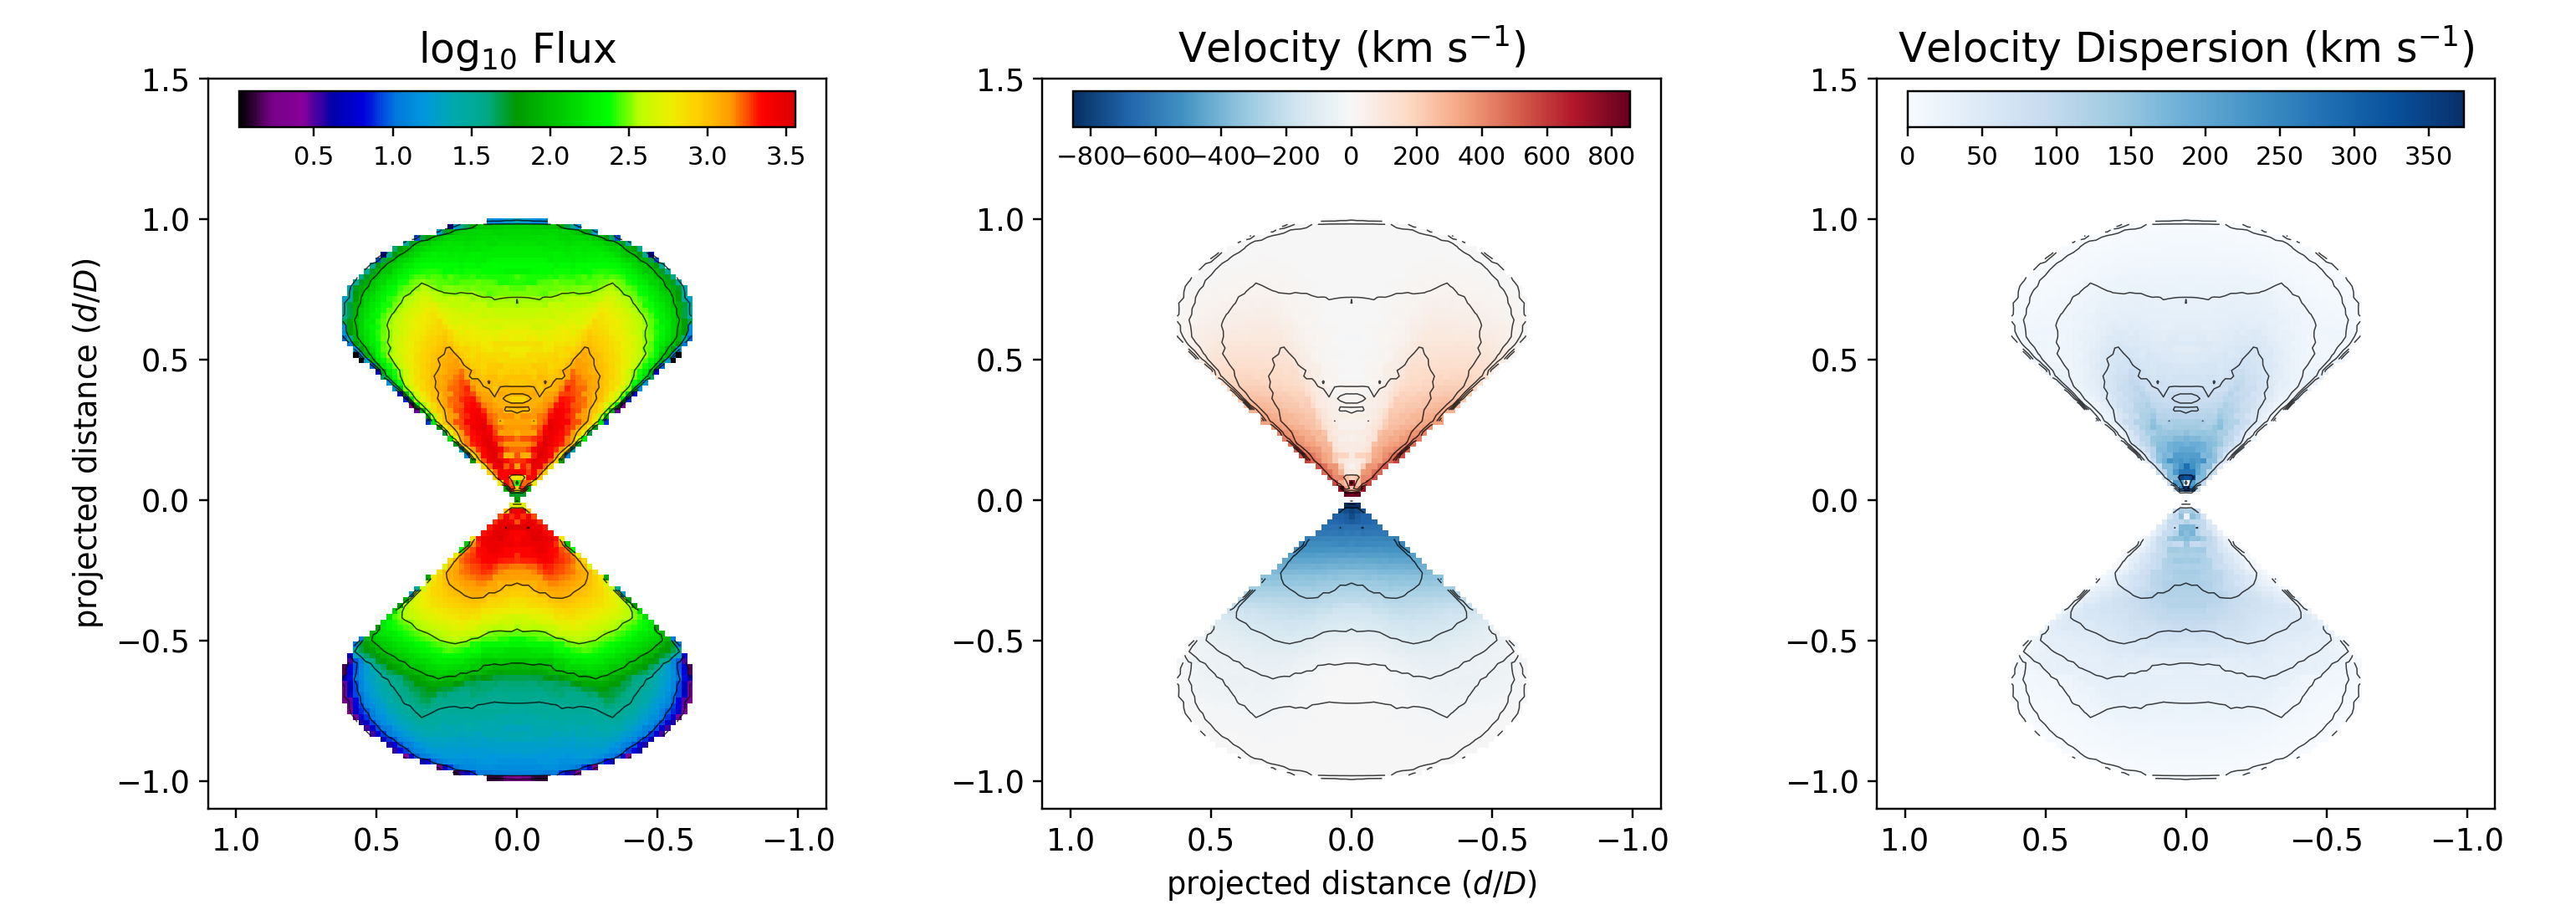

In [4]:
# Create 2d maps
fmap, vmap, dmap,v_int,d_int = bicone.map_2d(xbgrid,ybgrid,zbgrid,fgrid,vgrid,
                                             D=D,sampling=sampling,interpolation=map_interpolation,
                                             plot=True,save_fig=True)

### Generate the Emission Line Model

<IPython.core.display.Javascript object>


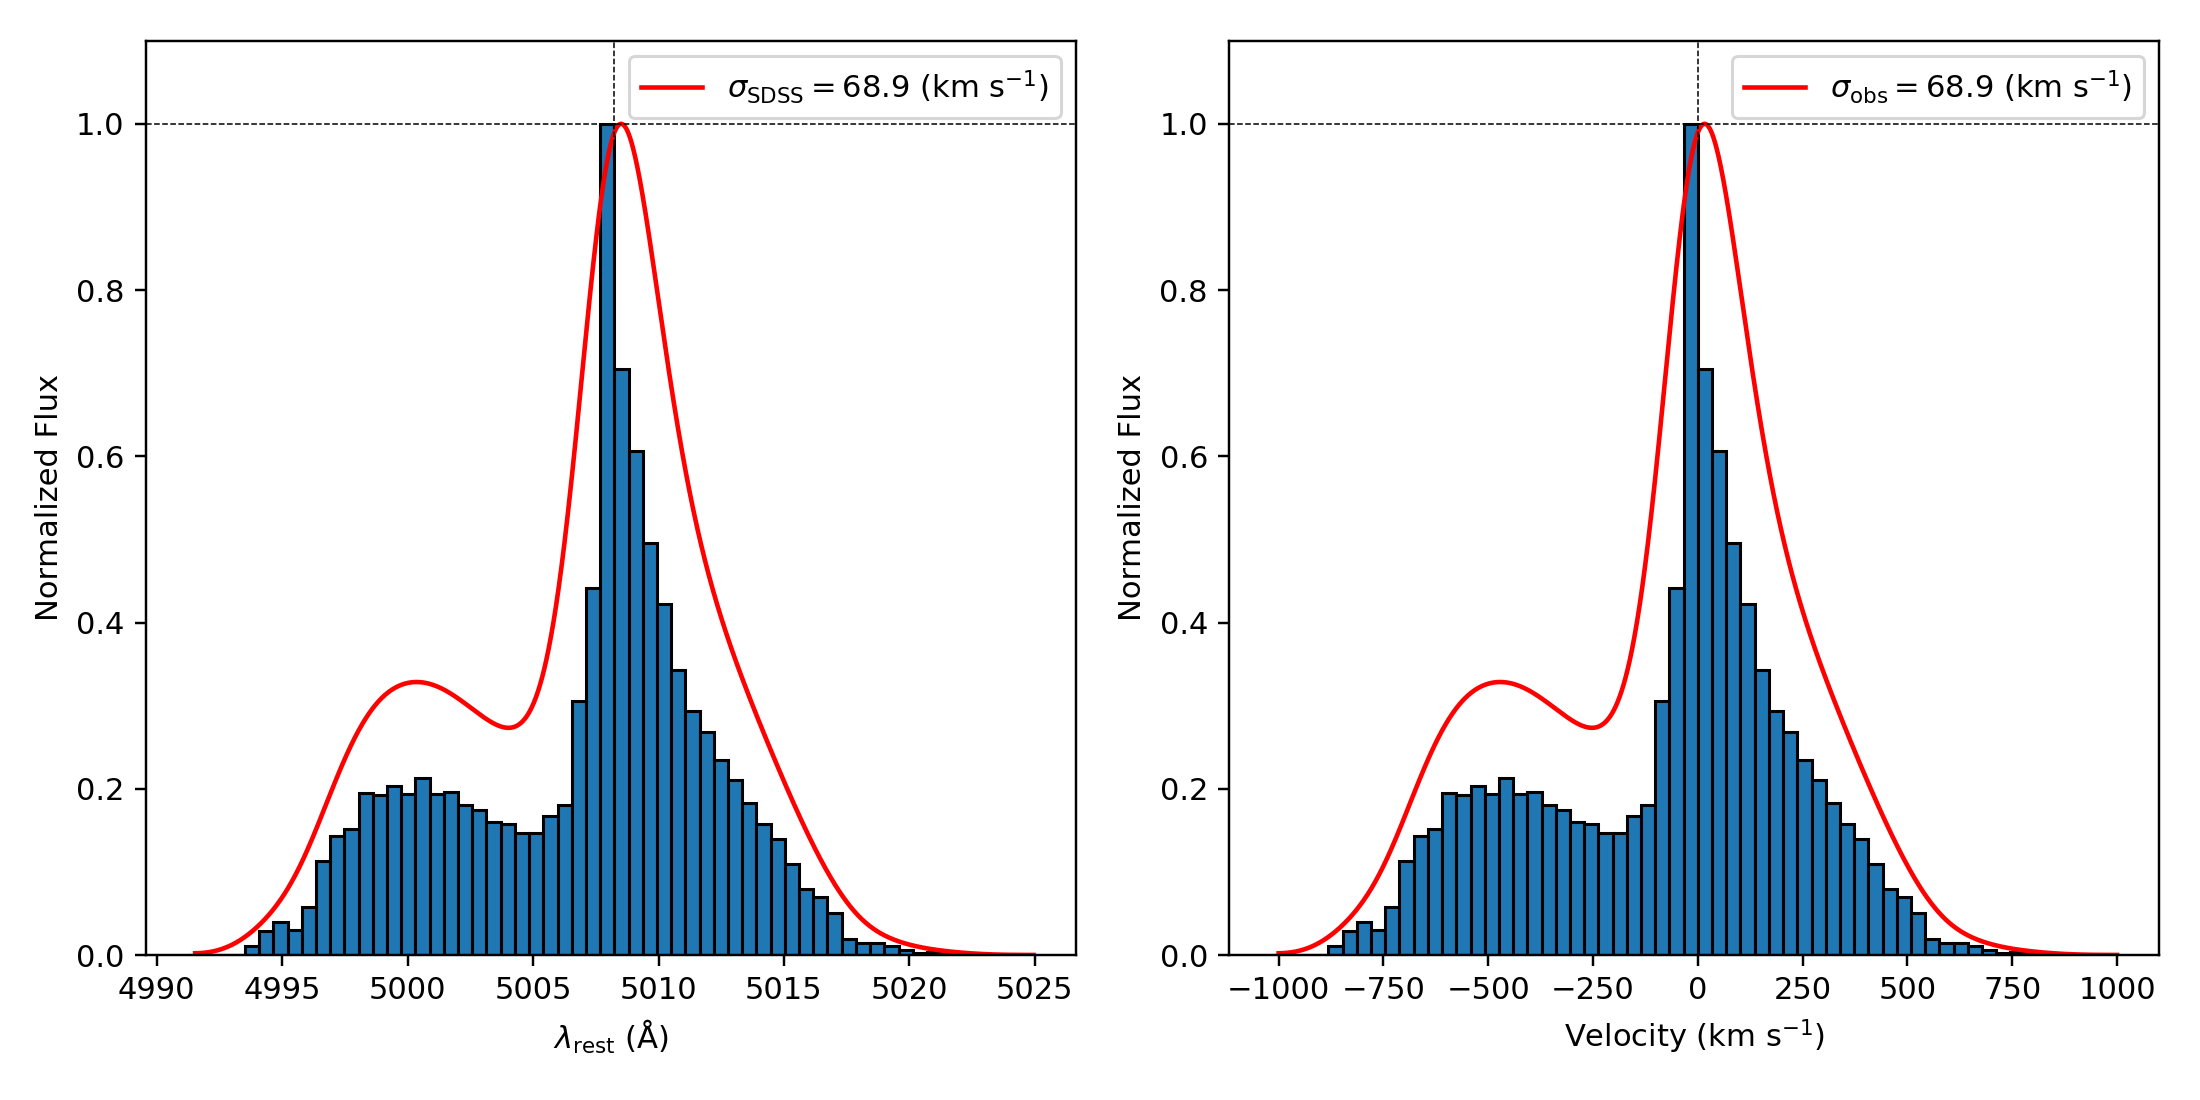

In [5]:
# Get emission line model
x,emline = bicone.emission_model(fgrid,vgrid,vmax=vmax,obs_res=obs_res,nbins=nbins,sampling=sampling,
                                 plot=True,save_fig=True)